<a href="https://colab.research.google.com/github/hyeonggyeong/Trend-visualization/blob/main/Code/%EC%98%A4%EB%8A%98%EC%9D%80_%EC%97%AC%EA%B8%B0%EA%B9%8C%EC%A7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 주제 소개

## 한 2 3개 정도로 구분해서 인스타 크롤링이나 기사 크롤링으로 현재 취준생들이 많이 생각하는 부분을 기반으로 분석을 준비햇다 블라블라 스토리 텔링 하면 될거 같아여

## 1-1. 선정 주제 소개

### ☞ 구직자를 위한 기업 트랜드를 보여주기 위해 산업 분류, 산업 규모에 따른 총 급여, 총 근무 시간을 시각화 하여 돈보다는 워라벨, 가성비를 따지는 2030 세대를 위한 시각화를 진행하였다 블라블라------------------

## 1-2. 주제 선정 이유

### 우리는 이러한 크롤링? 등을 해봤는데 요즘 취업 준비생들은 이러한 것들을 주로 생각하더라 블라블라 ----- 따라서 우리는 이러한 시각화를 통해 가성비, 워라벨 등을 생각하는 취준생들이 참고할 수 있도록 하였다.

# 2. 분석에 필요한 패키지 import

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
import matplotlib

# 한글은 맑은 고딕을 이용
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

# 경고메세지 무시
warnings.filterwarnings(action='ignore')

# 3. 데이터 준비

## 3-1. 사용 데이터

### ☞ 통계청에서 제공하는 @@ 데이터 사용

In [ ]:
df = pd.read_csv('https://github.com/hyeonggyeong/Trend-visualization/raw/main/Datasets/2_2_%EC%9E%84%EA%B8%88%EA%B3%BC%EA%B7%BC%EB%A1%9C(3%EB%B6%84%EA%B8%B0).csv',
                 encoding = 'CP949')
df.head(4)

# 나중에 데이터에 대한 설명을 해줘야 함 

,산업분류,규모별,2020 1/2,2020 1/2.1,2020 1/2.2,2020 1/2.3,2020 1/2.4,2020 1/2.5,2020 2/2,2020 2/2.1,2020 2/2.2,2020 2/2.3,2020 2/2.4,2020 2/2.5,2021 1/2,2021 1/2.1,2021 1/2.2,2021 1/2.3,2021 1/2.4,2021 1/2.5
0,산업분류,규모별,상용총근로시간 (시간),상용소정실근로시간 (시간),상용초과근로시간 (시간),상용정액급여 (원),상용초과급여 (원),상용특별급여 (원),상용총근로시간 (시간),상용소정실근로시간 (시간),상용초과근로시간 (시간),상용정액급여 (원),상용초과급여 (원),상용특별급여 (원),상용총근로시간 (시간),상용소정실근로시간 (시간),상용초과근로시간 (시간),상용정액급여 (원),상용초과급여 (원),상용특별급여 (원)
1,"석탄, 원유 및 천연가스 광업",5~9인,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,"석탄, 원유 및 천연가스 광업",10~29인,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,"석탄, 원유 및 천연가스 광업",30~99인,175.1,160.5,14.6,4649736,504809,736253,176.9,161.8,15.1,4505963,563020,947040,175.1,159.6,15.4,4754311,578219,675995


## 3-2. 데이터 정제

### ☞ 데이터를 분석하기 위한 전처리 과정으로 필요에 따라 데이터 및 컬럼을 삭제, 추가, 변경

In [ ]:
# 존재하지 않는 데이터가 ... 으로 되어있어서 nan으로 바꿈 
df[df == '...' ] = np.nan

In [ ]:
# 현재 데이터 프레임의 colums이 (년도 분기.데이터항목숫자)로 되어 있고 첫 행이 데이터항목숫자에 해당하는 항목의 내용이다.
#  따라서 첫번째 행의 내용을 저장 한 후, 첫 행을 삭제

new_col = df.loc[0].values
df.drop([0],axis = 0, inplace=True)

new_col

array(['산업분류', '규모별', '상용총근로시간 (시간)', '상용소정실근로시간 (시간)', '상용초과근로시간 (시간)',
       '상용정액급여 (원)', '상용초과급여 (원)', '상용특별급여 (원)', '상용총근로시간 (시간)',
       '상용소정실근로시간 (시간)', '상용초과근로시간 (시간)', '상용정액급여 (원)', '상용초과급여 (원)',
       '상용특별급여 (원)', '상용총근로시간 (시간)', '상용소정실근로시간 (시간)', '상용초과근로시간 (시간)',
       '상용정액급여 (원)', '상용초과급여 (원)', '상용특별급여 (원)'], dtype=object)

In [ ]:
# 데이터 프레임의 숫자들이 다 str이기 때문에 float로 바꾼 후, 3 분기에 해당하는 내용들을 평균으로 만든다.

list_1 = []
list_2 = []
list_3 = []
list_4 = []
list_5 = []
list_6 = []


for i in range(350):
    list_1.append(np.mean([float(df.iloc[i,[2,8,14]][0]),float(df.iloc[i,[2,8,14]][1]),float(df.iloc[i,[2,8,14]][2])]))    
    list_2.append(np.mean([float(df.iloc[i,[3,9,15]][0]),float(df.iloc[i,[3,9,15]][1]),float(df.iloc[i,[3,9,15]][2])]))
    list_3.append(np.mean([float(df.iloc[i,[4,10,16]][0]),float(df.iloc[i,[4,10,16]][1]),float(df.iloc[i,[4,10,16]][2])]))
    list_4.append(np.mean([float(df.iloc[i,[5,11,17]][0]),float(df.iloc[i,[5,11,17]][1]),float(df.iloc[i,[5,11,17]][2])]))
    list_5.append(np.mean([float(df.iloc[i,[6,12,18]][0]),float(df.iloc[i,[6,12,18]][1]),float(df.iloc[i,[6,12,18]][2])]))
    list_6.append(np.mean([float(df.iloc[i,[7,13,19]][0]),float(df.iloc[i,[7,13,19]][1]),float(df.iloc[i,[7,13,19]][2])]))

In [ ]:
# 데이터 프레임에 평균으로 통합된 값을 추가하고, 분기별로 나누어져 있던 값들을 싹다 없앤다.
# 추가적으로 총급여를 추가한다.

df['상용총근로시간']=list_1
df['상용소정실근로시간']=list_2
df['상용초과근로시간']=list_3
df['상용정액급여']=list_4
df['상용초과급여']=list_5
df['상용특별급여']=list_6
df.drop(df.columns[2:-6],axis=1, inplace = True)
df['한달총급여'] = df['상용정액급여']+df['상용초과급여']+df['상용특별급여']
df.sample(5)


,산업분류,규모별,상용총근로시간,상용소정실근로시간,상용초과근로시간,상용정액급여,상용초과급여,상용특별급여,한달총급여
190,도매 및 상품 중개업,300인이상,163.833333,156.300000,7.533333,4.819996e+06,247473.333333,1.208462e+06,6.275931e+06
240,방송업,300인이상,168.866667,159.033333,9.833333,5.444417e+06,322660.000000,1.313953e+06,7.081031e+06
286,"건축 기술, 엔지니어링 및 기타 과학기술 서비스업",5~9인,161.533333,160.700000,0.833333,3.458919e+06,48860.000000,1.620017e+05,3.669780e+06
290,"건축 기술, 엔지니어링 및 기타 과학기술 서비스업",300인이상,168.866667,157.733333,11.166667,4.360814e+06,425268.333333,5.654127e+05,5.351495e+06
206,항공 운송업,5~9인,145.133333,142.366667,2.733333,3.495291e+06,120418.666667,1.512423e+05,3.766952e+06


In [ ]:
# 데이터 description 
# 밑의 description을 보면 급여 부분들의표준편차가 평균값과 비교했을 떄, 시간 부분들 보다 높음을 알 수 있다.
# 이에 따라 급여 부분들은 편차가 크다고 생각했고, 근로시간 부분은 편차가 작다고 생각함
# 실제 boxplot을 통해서 직관적으로 규모가 시간 혹은 급여에 영향을 끼치는 지 확인한 후 

df.describe()

,상용총근로시간,상용소정실근로시간,상용초과근로시간,상용정액급여,상용초과급여,상용특별급여,한달총급여
count,313.000000,313.000000,310.000000,3.130000e+02,3.100000e+02,3.110000e+02,3.080000e+02
mean,168.084452,157.209372,10.980323,3.415065e+06,2.684877e+05,5.749828e+05,4.260241e+06
std,12.918678,9.773900,8.576359,8.313654e+05,2.125245e+05,6.196647e+05,1.365327e+06
min,84.133333,81.233333,0.200000,1.261456e+06,5.428333e+03,1.491400e+04,1.569611e+06
25%,162.433333,154.733333,4.541667,2.843369e+06,1.100015e+05,1.566857e+05,3.277110e+06
50%,167.800000,158.666667,8.566667,3.291906e+06,2.041810e+05,3.245663e+05,3.961164e+06
75%,174.733333,161.533333,16.000000,3.917102e+06,3.849754e+05,7.698727e+05,4.974976e+06
max,212.866667,184.233333,49.200000,6.254246e+06,1.025567e+06,3.609147e+06,9.126376e+06


# 한달에 얼마정도 받는가? 시각화

# 4. 데이터 시각화

## 4-1. 산업의 규모에 따른 총급여 분포 시각화

### ☞ 산점도(??)를 활용한 시각화

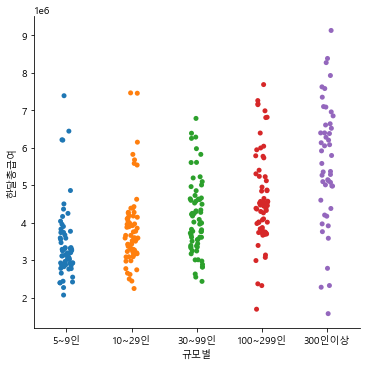

In [ ]:
# 규모가 한달 총급여에 유의미한 영향을 끼치는지 데이터 포인트를 직접적으로 확인하기 위하여 시행 
sns.catplot(data = df, x='규모별',y='한달총급여')

#### 설명 적기 ----------------------

### ☞ boxplot을 활용한 시각화

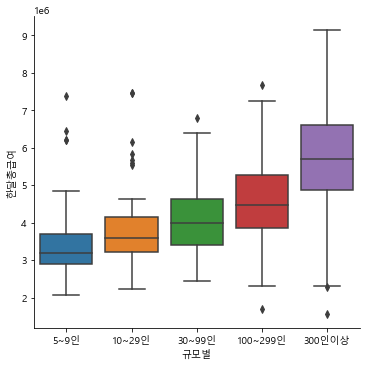

In [ ]:
# 규모가 한달 총급여에 영향을 끼치는지 확인하기 위하여 boxplot 개시
# 밑의 그래프를 보면, 평균값이 규모가 커짐에 따라 증가하는 것을 알 수 있다.
# 최대값을 보면 5~9인을 제외한 규모에서 증가하는 추세를 볼 수 있다.
# 최소값의 경우 비교적 평준화된 값을 가지고 있음을 알 수 있다.


sns.catplot(data = df, x='규모별',y='한달총급여', kind='box')

#### 설명 적기--------------------------

## 4-2. 산업분류와 규모로 멀티 인덱스를 생성하여 시각화 

In [ ]:
# 시각화를 위하여 멀티 인덱스 생성
df = df.set_index(['산업분류', '규모별'])

In [ ]:
# 기존 데이터를 5개의 산업 규모로 나눔
# 이 데이터는 차후 시간과 관련된 시각화 과정에도 이용할 것임 
scale_1 = df.xs('5~9인',level = '규모별').reset_index()
scale_2 = df.xs('10~29인',level = '규모별').reset_index()
scale_3 = df.xs('30~99인',level = '규모별').reset_index()
scale_4 = df.xs('100~299인',level = '규모별').reset_index()
scale_5 = df.xs('300인이상',level = '규모별').reset_index()

# 한달총급여와 관련된 시각화를 위하여 별도의 데이터 프레임을 생성 후 규모별 값들을 삽입
month_pay =pd.DataFrame({'산업분류':scale_1.산업분류,
                         '5~9인':scale_1.한달총급여,
                         '10~29인':scale_2.한달총급여,
                         '30~99인':scale_3.한달총급여,
                         '100~299인':scale_4.한달총급여,
                         '300인이상':scale_5.한달총급여
                        })

month_pay

,산업분류,5~9인,10~29인,30~99인,100~299인,300인이상
0,"석탄, 원유 및 천연가스 광업",NaN,NaN,5.971782e+06,NaN,NaN
1,금속 광업,NaN,NaN,NaN,NaN,NaN
2,비금속광물 광업; 연료용 제외,3.283856e+06,4.175075e+06,4.633530e+06,NaN,NaN
3,광업 지원 서비스업,NaN,NaN,NaN,NaN,NaN
4,식료품 제조업,2.867750e+06,2.738983e+06,3.246449e+06,3.695454e+06,3.964844e+06
...,...,...,...,...,...,...
65,"창작, 예술 및 여가관련 서비스업",2.758701e+06,3.264937e+06,3.819273e+06,4.010440e+06,3.756962e+06
66,스포츠 및 오락관련 서비스업,2.392708e+06,3.086714e+06,3.766921e+06,3.813544e+06,4.375752e+06
67,협회 및 단체,2.543998e+06,3.214381e+06,3.548539e+06,4.946731e+06,4.978747e+06
68,개인 및 소비용품 수리업,2.772022e+06,3.422475e+06,3.759394e+06,6.037277e+06,NaN


### ☞ 멀티 인덱스를 사용하여 같은 산업 분류에서 규모에 따른 총급여 차이 시각화

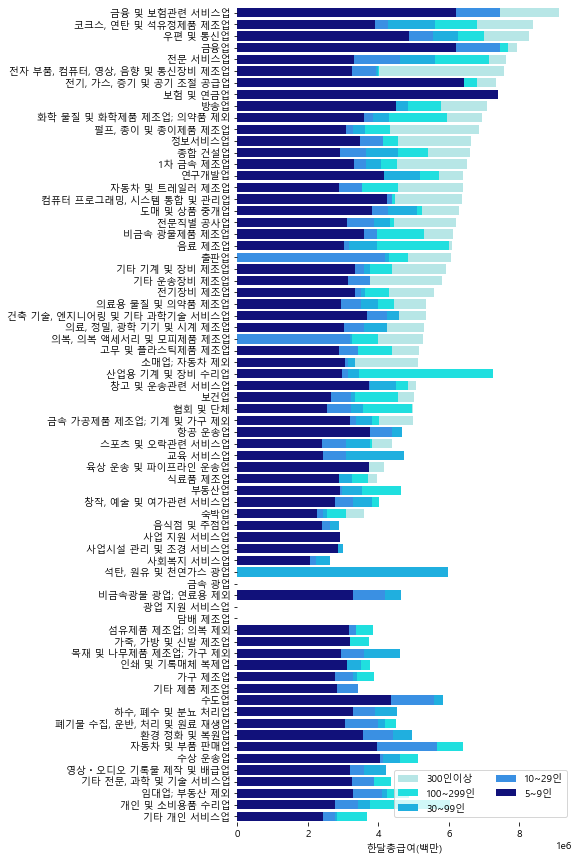

In [ ]:
# 시각화 과정
# 초기화
f, ax = plt.subplots(figsize=(6, 15))

# 정렬(규모가 클수록 한달총급여가 많을것이라 했기 떄문에 300인 이상 규모를 기준으로 내림차순)
month_data = month_pay.sort_values("300인이상", ascending=False)

# 300인이상
sns.barplot(x="300인이상", y="산업분류", data=month_data,
            label="300인이상", color="paleturquoise")

# 100~299인 사이
sns.barplot(x="100~299인", y="산업분류", data=month_data,
            label="100~299인", color="aqua")


# 30~99인사이
sns.barplot(x="30~99인", y="산업분류", data=month_data,
            label="30~99인", color="deepskyblue")

# 10~29인 사이
sns.barplot(x="10~29인", y="산업분류", data=month_data,
            label="10~29인", color="dodgerblue")

# 5~9인 사이
sns.barplot(x="5~9인", y="산업분류", data=month_data,
            label="5~9인", color="darkblue")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0,9500000), ylabel="",
       xlabel="한달총급여(백만)")
sns.despine(left=True, bottom=True)

#### 설명 적기 ----------------------------

# 5. 일주일 동안의 총 근무시간 분포 시각화

## 5-1. 산업 규모에 따른 일주일 동안의 총 근무시간 분포 시각화

In [ ]:
# 멀티인덱스 해제
df = df.reset_index()

### ☞ 산점도(??)를 활용한 시각화

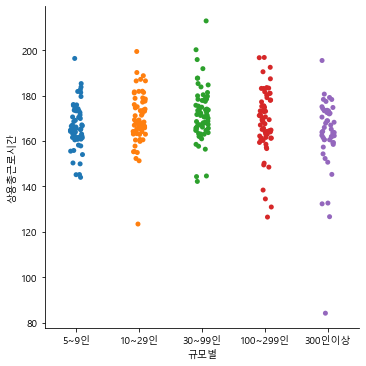

In [ ]:
# 규모가 한달 총 근로 시간에 유의미한 영향을 끼치는지 데이터 포인트를 직접적으로 확인하기 위하여 시행 

sns.catplot(data = df, x='규모별',y='상용총근로시간')

#### 설명 적기 ------------------------

### ☞ boxplot을 활용한 시각화

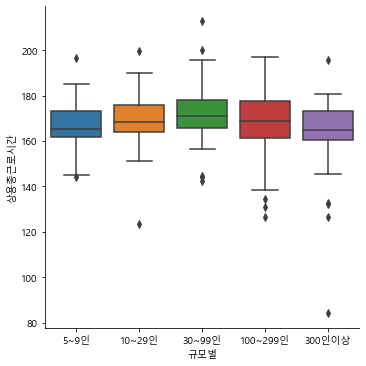

In [ ]:
# 박스플롯 설명!!
# 그냥 비슷하다!! 유의미한 결과가 없을 것 같다!!로 가자 
# 규모가 별 영향을 안끼치는 거 같은 경우 앞서 했던 박스플롯 이용하면 개떡같이 나와서 안된다. 등등 ....


sns.catplot(data = df, x='규모별',y='상용총근로시간', kind='box')

#### 설명 적기 -------------------

## 5-2. 산업분류와 규모로 멀티 인덱스를 생성하여 시각화 

In [ ]:
# 시각화를 위하여 멀티 인덱스 생성
df = df.set_index(['산업분류', '규모별'])

In [ ]:
# 한달총급여와 관련된 시각화를 위하여 별도의 데이터 프레임을 생성 후 규모별 값들을 삽입
month_work =pd.DataFrame({'산업분류':scale_1.산업분류,
                         '5~9인':scale_1.상용총근로시간,
                         '10~29인':scale_2.상용총근로시간,
                         '30~99인':scale_3.상용총근로시간,
                         '100~299인':scale_4.상용총근로시간,
                         '300인이상':scale_5.상용총근로시간
                        })

month_work

,산업분류,5~9인,10~29인,30~99인,100~299인,300인이상
0,"석탄, 원유 및 천연가스 광업",NaN,NaN,175.700000,NaN,NaN
1,금속 광업,NaN,NaN,NaN,NaN,NaN
2,비금속광물 광업; 연료용 제외,181.800000,199.400000,200.166667,NaN,NaN
3,광업 지원 서비스업,NaN,NaN,NaN,NaN,NaN
4,식료품 제조업,164.700000,169.300000,175.333333,192.433333,195.433333
...,...,...,...,...,...,...
65,"창작, 예술 및 여가관련 서비스업",157.800000,166.433333,161.666667,157.200000,161.933333
66,스포츠 및 오락관련 서비스업,145.200000,162.866667,173.400000,161.266667,132.300000
67,협회 및 단체,167.066667,160.633333,162.966667,162.166667,152.266667
68,개인 및 소비용품 수리업,173.633333,175.066667,171.200000,161.233333,NaN


### ☞ 멀티 인덱스를 사용하여 같은 산업 분류에서 규모에 따른 총급여 차이 시각화

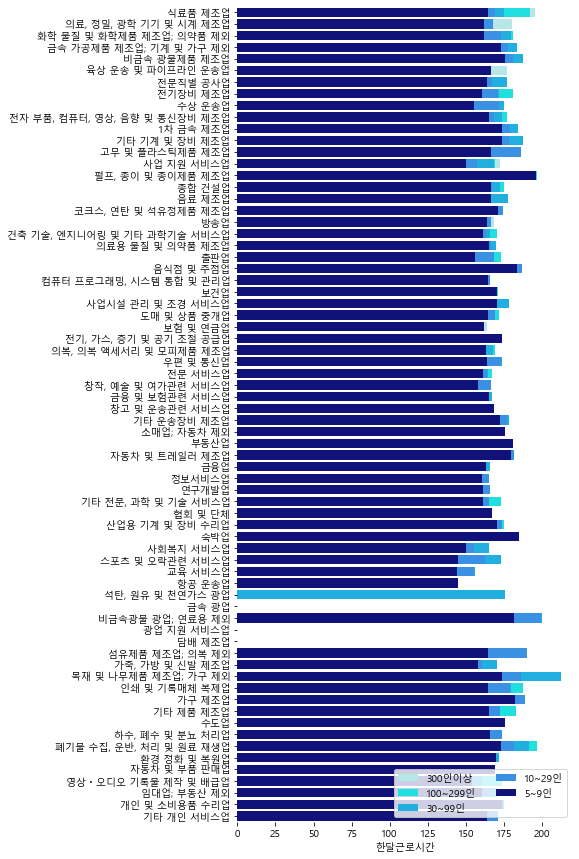

In [ ]:
# 이거는 그냥 심심해서 해본거임 실제로 어느정도 차이가날까 생각해서 대부분이 거의 차이 없음 
# 이거는 최종 시각화에 포함 x 

# 시각화 과정
# 초기화
f, ax = plt.subplots(figsize=(6, 15))

# 정렬(규모가 클수록 한달총급여가 많을것이라 했기 떄문에 300인 이상 규모를 기준으로 내림차순)
work_data = month_work.sort_values("300인이상", ascending=False)

# 300인이상
sns.barplot(x="300인이상", y="산업분류", data=work_data,
            label="300인이상", color="paleturquoise")

# 100~299인 사이
sns.barplot(x="100~299인", y="산업분류", data=work_data,
            label="100~299인", color="aqua")


# 30~99인사이
sns.barplot(x="30~99인", y="산업분류", data=work_data,
            label="30~99인", color="deepskyblue")

# 10~29인 사이
sns.barplot(x="10~29인", y="산업분류", data=work_data,
            label="10~29인", color="dodgerblue")

# 5~9인 사이
sns.barplot(x="5~9인", y="산업분류", data=work_data,
            label="5~9인", color="darkblue")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0,220), ylabel="",
       xlabel="한달근로시간")
sns.despine(left=True, bottom=True)

#### 설명 적기 ---------------------------------

In [ ]:
month_work['최대'] = month_work.max(axis=1)
month_work['최소'] = month_work.min(axis=1)
month_work['대소차이'] = month_work['최대']- month_work['최소']

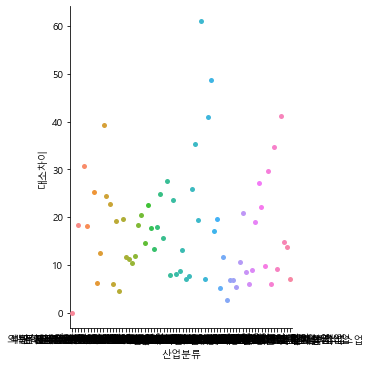

In [ ]:
sns.catplot(data = month_work, x='산업분류',y='대소차이')

<AxesSubplot:>

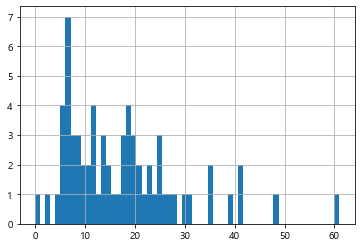

In [ ]:
month_work.대소차이.hist(bins=60)

In [ ]:
month_work['중앙'] = 

,산업분류,5~9인,10~29인,30~99인,100~299인,300인이상,최대,최소,대소차이
0,"석탄, 원유 및 천연가스 광업",NaN,NaN,175.700000,NaN,NaN,175.700000,175.700000,0.000000
1,금속 광업,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,비금속광물 광업; 연료용 제외,181.800000,199.400000,200.166667,NaN,NaN,200.166667,181.800000,18.366667
3,광업 지원 서비스업,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,식료품 제조업,164.700000,169.300000,175.333333,192.433333,195.433333,195.433333,164.700000,30.733333
...,...,...,...,...,...,...,...,...,...
65,"창작, 예술 및 여가관련 서비스업",157.800000,166.433333,161.666667,157.200000,161.933333,166.433333,157.200000,9.233333
66,스포츠 및 오락관련 서비스업,145.200000,162.866667,173.400000,161.266667,132.300000,173.400000,132.300000,41.100000
67,협회 및 단체,167.066667,160.633333,162.966667,162.166667,152.266667,167.066667,152.266667,14.800000
68,개인 및 소비용품 수리업,173.633333,175.066667,171.200000,161.233333,NaN,175.066667,161.233333,13.833333


# 6. 결론

## 6-1. 다양한 시각화 종합

### ☞ 설명 적기 --------------------------

## 6-2. 종합 결론

### ☞ 종합 결론 적기 ----------------------------